# Import libraries

In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from random import shuffle
import random

In [2]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Define constants & methods

In [5]:
%%javascript
var kernel = IPython.notebook.kernel;
var body = document.body,  
    attribs = body.attributes;
var command = "version_name = " + "'"+attribs['data-notebook-name'].value+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [6]:
version_name = version_name.split('.')[0]

In [7]:
save_model_path = "/home/sch17/Documents/fyp/notebooks/resnet/output/"+version_name
save_history_path = "/home/sch17/Documents/fyp/notebooks/resnet/output/"+version_name

In [8]:
save_history_path

'/home/sch17/Documents/fyp/notebooks/resnet/output/Resnet_v1_kcross'

In [9]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

In [10]:
# plot graphs for training and valdation data
def plot_graphs(history):
  acc = [0.] + history.history['accuracy']
  val_acc = [0.] + history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc,'o-g', label='Training Accuracy')
  plt.plot(val_acc, 'o-r',label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim([min(plt.ylim()),1])
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, 'o-g', label='Training Loss')
  plt.plot(val_loss, 'o-r',label='Validation Loss',color='red')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.ylim([0,3.0])
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

In [11]:
# get accuray of test data
def getModelAccuracy(dataframe):
    sample_test = dataframe
    correctPredictions = 0

    correctNormalPred = 0
    correctCovidPred = 0
    correctPneumoniaPred = 0

    totalNormalPred = 0
    totalCovidPred = 0
    totalPneumoniaPred = 0

    for index, row in sample_test.iterrows():

        filename = row['filename']
        prediction = row['category']

        # img = load_img(path + 'CrossValidationDataset\\' + filename, target_size=IMAGE_SIZE)

        if (path +'/normal') in filename:

            if prediction == 0:
                correctPredictions += 1
                correctNormalPred += 1

            totalNormalPred += 1

        if (path + '/covid') in filename:

            if prediction == 1: 
                correctPredictions += 1
                correctCovidPred += 1

            totalCovidPred += 1

        if (path + '/pneumonia') in filename:

            if prediction == 2: 
                correctPredictions += 1
                correctPneumoniaPred += 1

            totalPneumoniaPred += 1
            
    print('Model Accuracy:', "{:.2%}".format(correctPredictions / test_df.shape[0]))
    print('Correct Predictions:', correctPredictions, 'Total Predictions:', test_df.shape[0])

    print('\nNormal Predictions:', correctNormalPred, 'Accuracy', "{:.2%}".format(correctNormalPred /  totalNormalPred))
    print('Covid Predictions:', correctCovidPred, 'Accuracy', "{:.2%}".format(correctCovidPred /  totalCovidPred))
    print('Pneumonia Predictions:', correctPneumoniaPred, 'Accuracy', "{:.2%}".format(correctPneumoniaPred / totalPneumoniaPred))
    
    return (correctPredictions / test_df.shape[0]) * 100

In [12]:
# plot confusion matrix
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import itertools

# np_config.enable_numpy_behavior()
    
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion Matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Oranges')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    # thresh = np.max(cm) / 1.5 if normalize else np.max(cm) / 2

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    



In [13]:
path = "/home/sch17/Documents/fyp/dataset"

# Model






In [14]:
def CNNModel():
    init_model = tf.keras.applications.resnet50.ResNet50(include_top=False, input_shape=input_shape)
    x = init_model.output
    x = tfl.GlobalAveragePooling2D()(x)
    x = tfl.Dropout(0.2)(x)
    x = tfl.Dense(3, activation='softmax')(x) # 3 units
    new_model = Model(inputs=init_model.input, outputs=x)
    # without freezing layers - without getting pre-trained parameters

    return new_model

In [15]:
test_model = CNNModel()

In [16]:
test_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

# Create dataframe

In [17]:
directories = ['/normal']
categories = []
filenames = []
    
files = os.listdir(path + directories[0])

for img in files:
    categories.append(0)
    filenames.append(path+directories[0]+"/"+img)

files.sort()
df_NORMAL = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

print(df_NORMAL.shape[0])
df_NORMAL.head()

directories = ['/pneumonia']
categories = []
filenames = []
    
files = os.listdir(path + directories[0])

for img in files:
    categories.append(2)
    filenames.append(path+directories[0]+"/"+img)

files.sort()
df_PNEUMONIA = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

print(df_PNEUMONIA.shape[0])
df_PNEUMONIA.head()

directories = ['/covid']
categories = []
filenames = []
    
files = os.listdir(path + directories[0])

for img in files:
    categories.append(1)
    filenames.append(path+directories[0]+"/"+img)

files.sort()
df_COVID = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

print(df_COVID.shape[0])
df_COVID.head()


1583
4273
3616


,filename,category
0,/home/sch17/Documents/fyp/dataset/covid/COVID-...,1
1,/home/sch17/Documents/fyp/dataset/covid/COVID-...,1
2,/home/sch17/Documents/fyp/dataset/covid/COVID-...,1
3,/home/sch17/Documents/fyp/dataset/covid/COVID-...,1
4,/home/sch17/Documents/fyp/dataset/covid/COVID-...,1


In [18]:
pd.options.display.max_colwidth = 100

In [19]:
df = pd.concat([df_NORMAL, df_PNEUMONIA, df_COVID])


In [20]:
# shuffle data
df = df.sample(frac=1).reset_index(drop = True)
df

,filename,category
0,/home/sch17/Documents/fyp/dataset/covid/COVID-1428.png,1
1,/home/sch17/Documents/fyp/dataset/pneumonia/person348_virus_719.jpeg,2
2,/home/sch17/Documents/fyp/dataset/covid/COVID-638.png,1
3,/home/sch17/Documents/fyp/dataset/covid/COVID-168.png,1
4,/home/sch17/Documents/fyp/dataset/covid/COVID-3157.png,1
...,...,...
9467,/home/sch17/Documents/fyp/dataset/pneumonia/person684_bacteria_2580.jpeg,2
9468,/home/sch17/Documents/fyp/dataset/pneumonia/person16_bacteria_53.jpeg,2
9469,/home/sch17/Documents/fyp/dataset/pneumonia/person956_bacteria_2881.jpeg,2
9470,/home/sch17/Documents/fyp/dataset/pneumonia/person1449_bacteria_3745.jpeg,2


<AxesSubplot:>

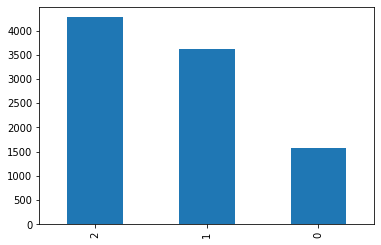

In [21]:
df['category'].value_counts().plot.bar()

train/val/test split - 60% | 20% | 20%

# K cross

Found 5682 validated image filenames belonging to 3 classes.
Found 1895 validated image filenames belonging to 3 classes.
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/20
178/178 [==============================] - 836s 5s/step - loss: 0.1144 - accuracy: 0.9564 - val_loss: 0.1572 - val_accuracy: 0.9678

Epoch 00001: val_loss improved from inf to 0.15725, saving model to /home/sch17/Documents/fyp/notebooks/resnet/output/Resnet_v1_kcross_0.h5


/home/sch17/.local/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/20
178/178 [==============================] - 817s 5s/step - loss: 0.0738 - accuracy: 0.9741 - val_loss: 0.2457 - val_accuracy: 0.9763

Epoch 00002: val_loss did not improve from 0.15725
Epoch 3/20
178/178 [==============================] - 819s 5s/step - loss: 0.0512 - accuracy: 0.9852 - val_loss: 0.2387 - val_accuracy: 0.9683

Epoch 00003: val_loss did not improve from 0.15725
Epoch 4/20
178/178 [==============================] - 819s 5s/step - loss: 0.0436 - accuracy: 0.9843 - val_loss: 0.5141 - val_accuracy: 0.9573

Epoch 00004: val_loss did not improve from 0.15725
Epoch 5/20
178/178 [==============================] - 819s 5s/step - loss: 0.0375 - accuracy: 0.9884 - val_loss: 0.1417 - val_accuracy: 0.9773

Epoch 00005: val_loss improved from 0.15725 to 0.14171, saving model to /home/sch17/Documents/fyp/notebooks/resnet/output/Resnet_v1_kcross_0.h5
Epoch 6/20
178/178 [==============================] - 818s 5s/step - loss: 0.0303 - accuracy: 0.9903 - val_loss: 0.2498 - val_a

<ipython-input-10-8123d4d3f45c>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(val_loss, 'o-r',label='Validation Loss',color='red')


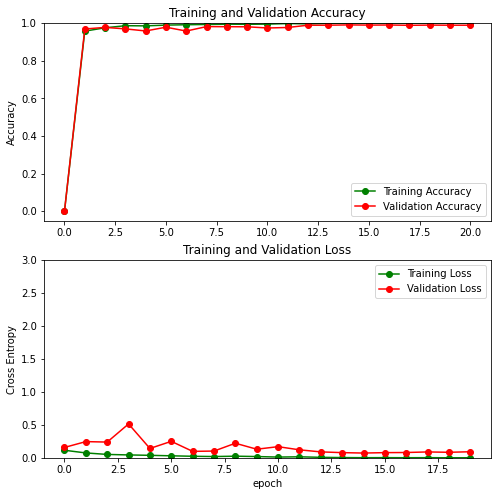

Found 1895 validated image filenames.
Model Accuracy: 98.73%
Correct Predictions: 1871 Total Predictions: 1895

Normal Predictions: 317 Accuracy 96.94%
Covid Predictions: 691 Accuracy 99.86%
Pneumonia Predictions: 863 Accuracy 98.52%


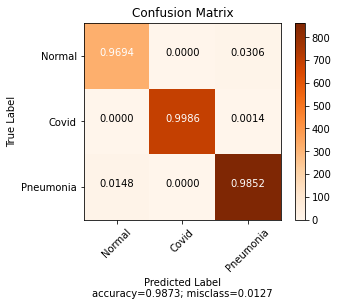

              precision    recall  f1-score   support

      Normal       0.96      0.97      0.96       327
       Covid       1.00      1.00      1.00       692
   Pneumonia       0.99      0.99      0.99       876

    accuracy                           0.99      1895
   macro avg       0.98      0.98      0.98      1895
weighted avg       0.99      0.99      0.99      1895

Precision: 0.9826734160830269
Recall: 0.9843778969636814
F1 : 0.9835183460455501
[[317   0  10]
 [  0 691   1]
 [ 13   0 863]]
Found 5682 validated image filenames belonging to 3 classes.
Found 1895 validated image filenames belonging to 3 classes.
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/20
178/178 [==============================] - 833s 5s/step - loss: 0.1239 - accuracy: 0.9534 - val_loss: 1.1691 - val_accuracy: 0.8639

Epoch 00001: val_loss improved from inf to 1.16914, saving model to /home/sch17/Documents/fyp/notebooks/resnet/output/Resnet_v1_k

/home/sch17/.local/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/20
178/178 [==============================] - 823s 5s/step - loss: 0.0745 - accuracy: 0.9752 - val_loss: 0.2188 - val_accuracy: 0.9694

Epoch 00002: val_loss improved from 1.16914 to 0.21884, saving model to /home/sch17/Documents/fyp/notebooks/resnet/output/Resnet_v1_kcross_0.h5
Epoch 3/20
178/178 [==============================] - 820s 5s/step - loss: 0.0571 - accuracy: 0.9808 - val_loss: 0.1809 - val_accuracy: 0.9852

Epoch 00003: val_loss improved from 0.21884 to 0.18087, saving model to /home/sch17/Documents/fyp/notebooks/resnet/output/Resnet_v1_kcross_0.h5
Epoch 4/20
178/178 [==============================] - 819s 5s/step - loss: 0.0424 - accuracy: 0.9852 - val_loss: 0.1437 - val_accuracy: 0.9678

Epoch 00004: val_loss improved from 0.18087 to 0.14371, saving model to /home/sch17/Documents/fyp/notebooks/resnet/output/Resnet_v1_kcross_0.h5
Epoch 5/20
178/178 [==============================] - 820s 5s/step - loss: 0.0327 - accuracy: 0.9894 - val_loss: 0.5387 - val_accuracy: 

<ipython-input-10-8123d4d3f45c>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(val_loss, 'o-r',label='Validation Loss',color='red')


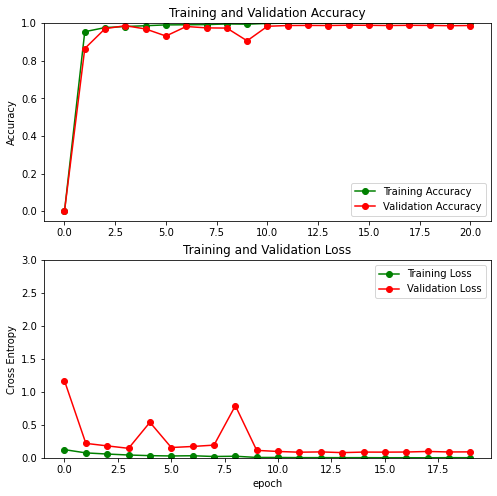

Found 1895 validated image filenames.
Model Accuracy: 99.16%
Correct Predictions: 1879 Total Predictions: 1895

Normal Predictions: 317 Accuracy 97.54%
Covid Predictions: 748 Accuracy 100.00%
Pneumonia Predictions: 814 Accuracy 99.03%


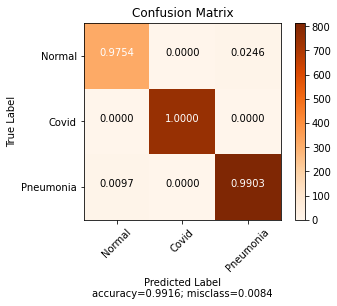

              precision    recall  f1-score   support

      Normal       0.98      0.98      0.98       325
       Covid       1.00      1.00      1.00       748
   Pneumonia       0.99      0.99      0.99       822

    accuracy                           0.99      1895
   macro avg       0.99      0.99      0.99      1895
weighted avg       0.99      0.99      0.99      1895

Precision: 0.9885507517624306
Recall: 0.9885507517624306
F1 : 0.9885507517624306
[[317   0   8]
 [  0 748   0]
 [  8   0 814]]
Found 5683 validated image filenames belonging to 3 classes.
Found 1895 validated image filenames belonging to 3 classes.
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/20
178/178 [==============================] - 828s 5s/step - loss: 0.1252 - accuracy: 0.9548 - val_loss: 2.4429 - val_accuracy: 0.8475

Epoch 00001: val_loss improved from inf to 2.44286, saving model to /home/sch17/Documents/fyp/notebooks/resnet/output/Resnet_v1_k

/home/sch17/.local/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/20
178/178 [==============================] - 819s 5s/step - loss: 0.0765 - accuracy: 0.9736 - val_loss: 3.0513 - val_accuracy: 0.8322

Epoch 00002: val_loss did not improve from 2.44286
Epoch 3/20
178/178 [==============================] - 825s 5s/step - loss: 0.0525 - accuracy: 0.9808 - val_loss: 0.2412 - val_accuracy: 0.9726

Epoch 00003: val_loss improved from 2.44286 to 0.24119, saving model to /home/sch17/Documents/fyp/notebooks/resnet/output/Resnet_v1_kcross_0.h5
Epoch 4/20
178/178 [==============================] - 820s 5s/step - loss: 0.0500 - accuracy: 0.9840 - val_loss: 0.0638 - val_accuracy: 0.9858

Epoch 00004: val_loss improved from 0.24119 to 0.06380, saving model to /home/sch17/Documents/fyp/notebooks/resnet/output/Resnet_v1_kcross_0.h5
Epoch 5/20
178/178 [==============================] - 821s 5s/step - loss: 0.0411 - accuracy: 0.9866 - val_loss: 0.1571 - val_accuracy: 0.9778

Epoch 00005: val_loss did not improve from 0.06380
Epoch 6/20
178/178 [==============

<ipython-input-10-8123d4d3f45c>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(val_loss, 'o-r',label='Validation Loss',color='red')


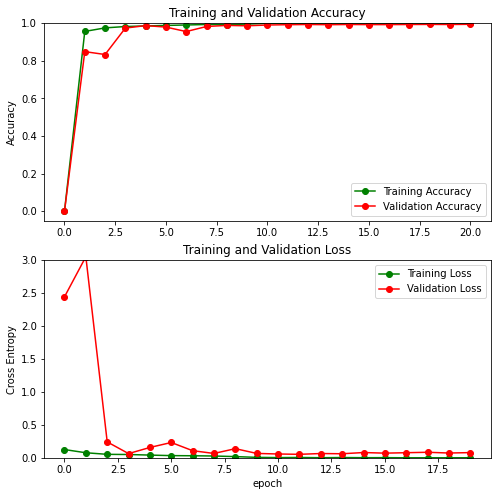

Found 1894 validated image filenames.
Model Accuracy: 99.05%
Correct Predictions: 1876 Total Predictions: 1894

Normal Predictions: 313 Accuracy 98.12%
Covid Predictions: 703 Accuracy 100.00%
Pneumonia Predictions: 860 Accuracy 98.62%


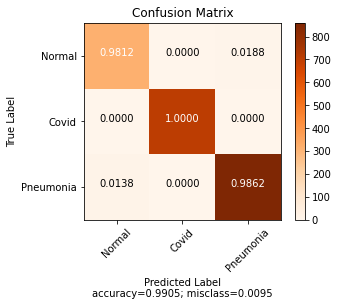

              precision    recall  f1-score   support

      Normal       0.96      0.98      0.97       319
       Covid       1.00      1.00      1.00       703
   Pneumonia       0.99      0.99      0.99       872

    accuracy                           0.99      1894
   macro avg       0.99      0.99      0.99      1894
weighted avg       0.99      0.99      0.99      1894

Precision: 0.9853828388701368
Recall: 0.9891432515602082
F1 : 0.9872309858550915
[[313   0   6]
 [  0 703   0]
 [ 12   0 860]]
Found 5683 validated image filenames belonging to 3 classes.
Found 1895 validated image filenames belonging to 3 classes.
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/20
178/178 [==============================] - 832s 5s/step - loss: 0.1271 - accuracy: 0.9565 - val_loss: 0.2214 - val_accuracy: 0.9504

Epoch 00001: val_loss improved from inf to 0.22139, saving model to /home/sch17/Documents/fyp/notebooks/resnet/output/Resnet_v1_k

/home/sch17/.local/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/20
178/178 [==============================] - 823s 5s/step - loss: 0.0741 - accuracy: 0.9771 - val_loss: 0.4912 - val_accuracy: 0.9251

Epoch 00002: val_loss did not improve from 0.22139
Epoch 3/20
178/178 [==============================] - 822s 5s/step - loss: 0.0578 - accuracy: 0.9812 - val_loss: 0.7153 - val_accuracy: 0.9541

Epoch 00003: val_loss did not improve from 0.22139
Epoch 4/20
178/178 [==============================] - 825s 5s/step - loss: 0.0478 - accuracy: 0.9829 - val_loss: 1.1408 - val_accuracy: 0.8897

Epoch 00004: val_loss did not improve from 0.22139
Epoch 5/20
178/178 [==============================] - 819s 5s/step - loss: 0.0340 - accuracy: 0.9898 - val_loss: 0.1948 - val_accuracy: 0.9763

Epoch 00005: val_loss improved from 0.22139 to 0.19477, saving model to /home/sch17/Documents/fyp/notebooks/resnet/output/Resnet_v1_kcross_0.h5
Epoch 6/20
178/178 [==============================] - 820s 5s/step - loss: 0.0355 - accuracy: 0.9893 - val_loss: 0.2145 - val_a

<ipython-input-10-8123d4d3f45c>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(val_loss, 'o-r',label='Validation Loss',color='red')


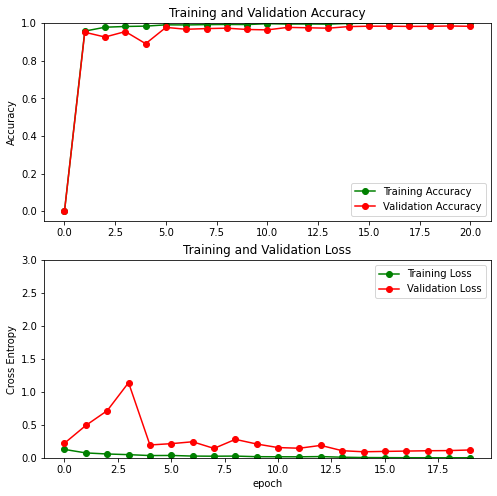

Found 1894 validated image filenames.
Model Accuracy: 98.84%
Correct Predictions: 1872 Total Predictions: 1894

Normal Predictions: 305 Accuracy 98.07%
Covid Predictions: 728 Accuracy 99.86%
Pneumonia Predictions: 839 Accuracy 98.24%


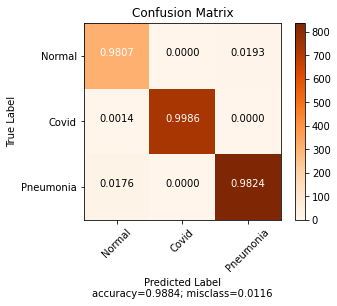

              precision    recall  f1-score   support

      Normal       0.95      0.98      0.97       311
       Covid       1.00      1.00      1.00       729
   Pneumonia       0.99      0.98      0.99       854

    accuracy                           0.99      1894
   macro avg       0.98      0.99      0.98      1894
weighted avg       0.99      0.99      0.99      1894

Precision: 0.9810183905079665
Recall: 0.9872570835252016
F1 : 0.9840477732433864
[[305   0   6]
 [  1 728   0]
 [ 15   0 839]]
Found 5683 validated image filenames belonging to 3 classes.
Found 1895 validated image filenames belonging to 3 classes.
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/20
178/178 [==============================] - 830s 5s/step - loss: 0.1297 - accuracy: 0.9542 - val_loss: 0.4488 - val_accuracy: 0.9277

Epoch 00001: val_loss improved from inf to 0.44885, saving model to /home/sch17/Documents/fyp/notebooks/resnet/output/Resnet_v1_k

/home/sch17/.local/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/20
178/178 [==============================] - 819s 5s/step - loss: 0.0774 - accuracy: 0.9736 - val_loss: 0.1569 - val_accuracy: 0.9715

Epoch 00002: val_loss improved from 0.44885 to 0.15693, saving model to /home/sch17/Documents/fyp/notebooks/resnet/output/Resnet_v1_kcross_0.h5
Epoch 3/20
178/178 [==============================] - 821s 5s/step - loss: 0.0429 - accuracy: 0.9856 - val_loss: 0.2912 - val_accuracy: 0.9731

Epoch 00003: val_loss did not improve from 0.15693
Epoch 4/20
178/178 [==============================] - 822s 5s/step - loss: 0.0398 - accuracy: 0.9861 - val_loss: 0.5068 - val_accuracy: 0.9356

Epoch 00004: val_loss did not improve from 0.15693
Epoch 5/20
178/178 [==============================] - 821s 5s/step - loss: 0.0327 - accuracy: 0.9896 - val_loss: 0.2556 - val_accuracy: 0.9377

Epoch 00005: val_loss did not improve from 0.15693
Epoch 6/20
178/178 [==============================] - 820s 5s/step - loss: 0.0312 - accuracy: 0.9905 - val_loss: 0.2173 - val_a

<ipython-input-10-8123d4d3f45c>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(val_loss, 'o-r',label='Validation Loss',color='red')


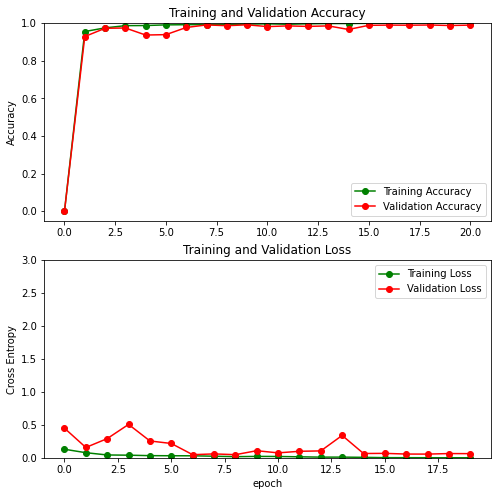

Found 1894 validated image filenames.
Model Accuracy: 98.57%
Correct Predictions: 1867 Total Predictions: 1894

Normal Predictions: 285 Accuracy 94.68%
Covid Predictions: 744 Accuracy 100.00%
Pneumonia Predictions: 838 Accuracy 98.70%


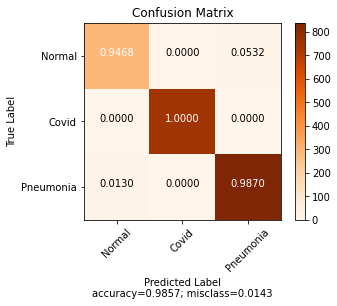

              precision    recall  f1-score   support

      Normal       0.96      0.95      0.95       301
       Covid       1.00      1.00      1.00       744
   Pneumonia       0.98      0.99      0.98       849

    accuracy                           0.99      1894
   macro avg       0.98      0.98      0.98      1894
weighted avg       0.99      0.99      0.99      1894

Precision: 0.9813674916133932
Recall: 0.9779624781679183
F1 : 0.9796398315712443
[[285   0  16]
 [  0 744   0]
 [ 11   0 838]]
[98.7335092348285, 99.15567282321899, 99.04963041182681, 98.83843717001056, 98.57444561774024]
average accuracy =  98.87033905152502


In [22]:
from sklearn.model_selection import KFold

fold_no = 1
batch_size = 32
epochs = 20

acc_per_fold = []
perf_per_fold = []

inputs = df['filename']
targets = df['category']

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)
i = 0

for train, test in kfold.split(inputs, targets):
  init_model = tf.keras.applications.resnet50.ResNet50(include_top=False, input_shape=input_shape)
  x = init_model.output
  x = tfl.GlobalAveragePooling2D()(x)
  x = tfl.Dropout(0.2)(x)
  x = tfl.Dense(3, activation='softmax')(x) # 3 units
  model = Model(inputs=init_model.input, outputs=x)

  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate= 0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
  
  ##Separate Training Data
  categories = []
  
  for img in inputs[train]:

      fileName = img.split('.')[0]

      if 'normal' in fileName: categories.append(0)
      elif 'covid' in fileName: categories.append(1)
      else: categories.append(2)

  cross_val_df = pd.DataFrame ({
      'filename': inputs[train],
      'category': categories
  })
  
  cross_val_df["category"] = cross_val_df["category"].replace({0: 'Normal', 1: 'Covid', 2:'Pneumonia'})
  
  train_df, validate_df = train_test_split(cross_val_df, test_size=0.25)
  train_df = train_df.reset_index(drop=True)
  validate_df = validate_df.reset_index(drop=True)

  train_generator = ImageDataGenerator(
      preprocessing_function = tf.keras.applications.resnet50.preprocess_input,
      width_shift_range = 0.1,
      height_shift_range = 0.1
      ).flow_from_dataframe (
        train_df, 
        x_col = 'filename',
        y_col = 'category',
        target_size = IMAGE_SIZE,
        class_mode = 'categorical',
        batch_size = batch_size
    )
  
  validation_generator = ImageDataGenerator(preprocessing_function = tf.keras.applications.resnet50.preprocess_input).flow_from_dataframe (
        validate_df, 
        x_col ='filename',
        y_col = 'category',
        target_size = IMAGE_SIZE,
        class_mode = 'categorical',
        batch_size = batch_size
    )
  
  
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  
  model_checkpoint = ModelCheckpoint(save_model_path + '_' + str(i) +".h5", save_best_only=True, verbose=1)
  reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1)

  history = model.fit(train_generator,
                    validation_data=validation_generator, 
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[model_checkpoint, reduce_lr])
  
  model.save(save_model_path + '_' + str(i) +".h5") # save path
  filename = save_history_path+"history" + str(i) +".npy"
  np.save(filename,history.history)

  plot_graphs(history)

  ##Separate Testing Data
  test_filenames = []
    
  for img in inputs[test]:

      test_filenames.append(img)
      
  test_df = pd.DataFrame({
      'filename': test_filenames
  })
  
  nb_samples = test_df.shape[0]

  test_generator = ImageDataGenerator(preprocessing_function = tf.keras.applications.resnet50.preprocess_input,).flow_from_dataframe(
      test_df, 
      x_col = 'filename',
      y_col = None,
      class_mode = None,
      target_size = IMAGE_SIZE,
      batch_size = batch_size,
      shuffle = False
  )

  #Get Test Data Predictions 
  predict = model.predict(test_generator, steps=np.ceil(nb_samples/batch_size))

  # print("predict================================================================")
  # print(predict)
  # print("done================================================================")

  test_df['category'] = np.argmax(predict, axis=-1)
  label_map = dict((v,k) for k,v in train_generator.class_indices.items())
  test_df['category'] = test_df['category'].replace(label_map)
  test_df['category'] = test_df['category'].replace({'Normal': 0, 'Covid': 1, 'Pneumonia': 2})

  actual = []
  pred = []

  for row in test_df.iterrows():

      filename = row[1][0]

      if 'normal' in filename: actual.append(0)
      if 'covid' in filename: actual.append(1)
      if 'pneumonia' in filename: actual.append(2)
      pred.append(row[1][1])


  fold_no = fold_no + 1

  # Get performance metrics  
  accuracy = getModelAccuracy(test_df)
  acc_per_fold.append(accuracy)
  perf_per_fold.append([actual, pred])

  cf = confusion_matrix(actual, pred)

  # print("##############################printing cf#################################")
  # print(cf)
  # print(type(cf))
  # print("##############################done#################################")

    
  target_names = ['Normal','Covid', 'Pneumonia']
  plot_confusion_matrix(cf, target_names)

  print(classification_report(actual, pred, target_names=target_names))  
  # break
  # if(fold_no==4):
  
  # calculate precision
  precision = precision_score(actual, pred,  average='macro')
  print('Precision:', precision)

  # calculate recall
  recall = recall_score(actual, pred,  average='macro')
  print('Recall:', recall)

  # f1
  # f1 =  2 * (precision * recall) / (precision + recall)
  f1 = f1_score(actual, pred,  average='macro')
  print ("F1 :", f1)

  print(confusion_matrix(actual, pred))
print(acc_per_fold)
print("average accuracy = ",sum(acc_per_fold)/5)

/home/sch17/.local/lib/python3.8/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

(32, 224, 224, 3)


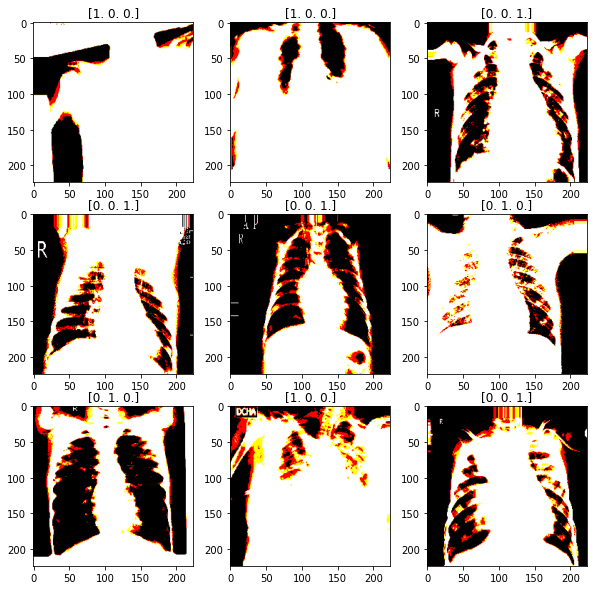

In [23]:
plt.figure(figsize=(10, 10))
batch=next(train_generator)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels

for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  img=batch[0][i]
  plt.title(batch[1][i])
  plt.imshow(img)  

# Saved model

In [ ]:
loaded_model = tf.keras.models.load_model(save_model_path)











































































































# predict

In [ ]:
pre_test_df = test_df

In [ ]:
batch_size = 32
nb_samples = test_df.shape[0]

In [ ]:
test_generator = ImageDataGenerator(preprocessing_function = tf.keras.applications.resnet50.preprocess_input,).flow_from_dataframe(
    test_df, 
    x_col = 'filename',
    y_col = None,
    class_mode = None,
    target_size = IMAGE_SIZE,
    batch_size = batch_size,
    shuffle = False
)

In [ ]:
predict = loaded_model.predict(test_generator_eval, steps = np.ceil(nb_samples/batch_size))


In [ ]:
test_df['category'] = np.argmax(predict, axis=-1)

In [ ]:
sample_test = test_df.head(18)
sample_test.head()

# Calculate Model Accuracy

In [ ]:
sample_test = test_df
correctPredictions = 0

correctNormalPred = 0
correctCovidPred = 0
correctPneuPred = 0

totalNormalPred = 0
totalCovidPred = 0
totalPneuPred = 0

for index, row in sample_test.iterrows():
    
    filename = row['filename']
    prediction = row['category']
    
    img = load_img( filename, target_size=IMAGE_SIZE)
    
    if 'normal' in filename:
        
        if prediction == 0:
            correctPredictions += 1
            correctNormalPred += 1
            
        totalNormalPred += 1
    
    if 'covid' in filename:
        if prediction == 1: 
            correctPredictions += 1
            correctCovidPred += 1
            
        totalCovidPred += 1
    
    if 'pneumonia' in filename:
        
        if prediction == 2: 
            correctPredictions += 1
            correctPneuPred += 1
            
        totalPneuPred += 1

In [ ]:
print('Model Accuracy:', "{:.2%}".format(correctPredictions / test_df.shape[0]))
print('Correct Predictions:', correctPredictions, 'Total Predictions:', test_df.shape[0])

print('\nNormal Predictions:', correctNormalPred, 'Accuracy', "{:.2%}".format(correctNormalPred /  totalNormalPred))
print('COVID-19 Predictions:', correctCovidPred, 'Accuracy', "{:.2%}".format(correctCovidPred /  totalCovidPred))
print('Viral Pneumonia Predictions:', correctPneuPred, 'Accuracy', "{:.2%}".format(correctPneuPred / totalPneuPred))

In [ ]:
actual = []
pred = []

for row in test_df.iterrows():
    
    filename = row[1][0]
    
    if 'normal' in filename: actual.append(0)
    if 'covid' in filename: actual.append(1)
    if 'pneumonia' in filename: actual.append(2)
        
    pred.append(row[1][1])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(actual, pred))  

In [ ]:
confusion_matrix(actual, pred)

# Predict single

In [ ]:
batch_size = 1
nb_samples = 1

In [ ]:
test_file = []
df_file = pd.DataFrame({
    'filename': test_file
})

In [ ]:
df_file

In [ ]:
test_single_gen = ImageDataGenerator(preprocessing_function = tf.keras.applications.resnet50.preprocess_input,).flow_from_dataframe(
    df_file, 
    x_col = 'filename',
    y_col = None,
    class_mode = None,
    target_size = IMAGE_SIZE,
    batch_size = batch_size,
    shuffle = False
)

In [ ]:
predict = loaded_model.predict(test_single_gen, steps = np.ceil(nb_samples/batch_size))

In [ ]:
df_file['category'] = np.argmax(predict, axis=-1)

In [ ]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
df_file['category'] = df_file['category'].replace(label_map)

In [ ]:
# df_file['category'] = df_file['category'].replace({'Normal': 0, 'Covid': 1, 'Pneumonia': 2})

In [ ]:
df_file